# Reducing loss/ optimization as  learning

Author: Adam Rivers

Some material modified from the [Google ML Crash Course](https://developers.google.com/machine-learning/crash-course/reducing-loss/an-iterative-approach)

# What are Loss and Error?

In the previous section we looked at ordinary least squares (OLS) linear regression from a machine learning 
context. OLS linear regression minimizes **error** by minimizing the Sum of the square residuals:
    
$$ RSS = \sum_{i=1}^{n} (Y_{i} - \hat{Y}_i)^2 $$


The Sum of the Square Residuals (above) is only one way of representing error. 

Other methods of representing **error** include:

* Root mean square error
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (Y_{i} - \hat{Y}_i)^2}$$

* Mean Absolute error (L1)
$$\frac{1}{n} \sum_{i=1}^{n} \vert Y_{i} - \hat{Y}_i \vert $$
* Mean Squared Error (L2)
$$\frac{1}{n} \sum_{i=1}^{n} (Y_{i} - \hat{Y}_i)^2$$
* Cross entropy error (binary classification)
$$\sum_{i=1}^{n} -(y_{i}\log(p_{i}) + (1-y_{i})\log(1 - p_{i} ))$$
 

# Cost functions vs. loss functions

A **loss function** is something that can be calculated on a single observation, for example:

$$\mathscr{L}(y\hat,y) = \frac{1}{2}(\hat{y} - y )^2 $$

A **cost function** is the sum of lost functions over a batch of data, For example:

$$Cost Function = \frac{1}{m}\sum_{i=1}^{m}\mathscr{L}(\hat{y}^{(i)} - y^{(i)})^2 $$

So the loss is how good a single prediction is and cost is how good a set of predictions are.  Not everyone makes this distinction however.

# Why are there different loss functions?

Loss functions are chosen to make the process of learning the model parameters (fitting) as easy as possible. If you are a consumer of machine learning algorithms fitting parameters is the hidden middle step in most learning methods.

Recall the steps of model training:

1. Select a model
2. Fit the best parameters to the model
3. Evaluate the model

![learning-opt.svg](../nb-images/learning-opt.svg)

## Learning Parameters and fitting

The process of learning model parameter values is at the heart of machine learning. This is the step where learning occurs. As someone who applies machine learning to their data rather than developing their own ML algorithms this process can be somewhat hidden.

Common optimization methods for ML today are: 
* Stochastic gradient Descent
* ADAM
* AdaGrad
* RMSProp
* Momentum

You can visually try out the optimizers  by clicking on as any point on the surface below to see how the optimizer finds a minima.

The graphic is from [Emilien Dupont](https://bl.ocks.org/EmilienDupont/raw/aaf429be5705b219aaaf8d691e27ca87).


# What users need to know about Loss and optimization

For most machine learning applications the technical details of the optimizer are hidden but the choice of optimizer and the parameter settings can make a difference in the performance of your methods.  To select those correctly it helps to know several things about optimizers.


## Learning is iterative

1. A portion of the training data is evaluated with the current parameters
2. Based on whether that change increased or decreased loss the parameter is changed and the process is repeated. 


Reducing Loss: An Iterative Approach

The previous example introduced the concept of loss. Here, in this module, you'll learn how a machine learning model iteratively reduces loss.

Iterative learning might remind you of the "Hot and Cold" kid's game for finding a hidden object like a thimble. In this game, the "hidden object" is the best possible model. You'll start with a wild guess ("The value of  is 0.") and wait for the system to tell you what the loss is. Then, you'll try another guess ("The value of  is 0.5.") and see what the loss is. Aah, you're getting warmer. Actually, if you play this game right, you'll usually be getting warmer. The real trick to the game is trying to find the best possible model as efficiently as possible.

The following figure suggests the iterative trial-and-error process that machine learning algorithms use to train a model:

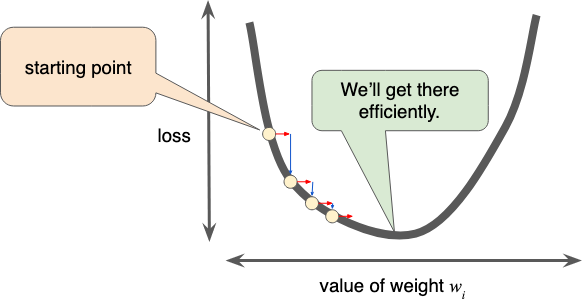

## Learning rates

Most optimizers work by evaluating loss at a point in parameter space then altering that parameter by some amount. 

Should we change the parameter by a little bit or a lot? This is the question we are answering when we select a learning rate.

Here's what happens if our learning rate is too small:

![](../nb-images/LearningRateTooSmall.svg)

Here's what happens if our learning rate is too big:

![](../nb-images/LearningRateTooLarge.svg)

Here's what we want:

![](../nb-images/LearningRateJustRight.svg)

Many modern solvers will select the learning rate dynamically based on how steep the gradient is.


# Exercise 1

Create your own loss function. First lets define the data and model for their fit


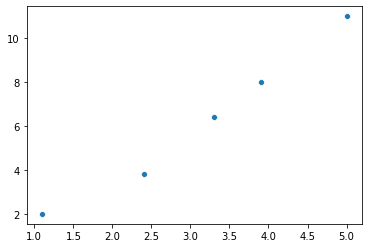

In [1]:
# Data
import numpy as np
x = np.array([1.1, 2.4, 3.3, 3.9, 5.0])
y = np.array([2, 3.8, 6.4, 8.0, 11.0])

# Assume this is our model fit
yhat = 2*x

import seaborn as sns
sns.scatterplot(x,y)


Here is an example of a function that would calculate L1 loss:

In [2]:
# write a function for the l1 loss
def l1_loss(y, yhat):
    loss = sum(np.absolute(y-yhat))/len(y)
    return loss

# calculate the l1 loss
l1_loss(y, yhat)

0.5199999999999999

Now write a function to calculate L2 loss and compare the difference.

What effect do outliers have on each method?



In [3]:
def l2_loss(y, yhat):
    loss = sum((y-yhat)**2)/len(y)
    return loss

# calcualte the l2  loss
l2_loss(y, yhat)


0.42400000000000004

In [4]:
l1_vect = np.absolute(y-yhat)/len(y)
l1_vect

array([0.04, 0.2 , 0.04, 0.04, 0.2 ])

In [5]:
l2_vect = (y-yhat)**2/len(y)
l2_vect

array([0.008, 0.2  , 0.008, 0.008, 0.2  ])